In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [35]:
df = pd.read_csv('ts_data_norm_fullbaseline.csv')
df.head()

,subject_id,model,scalar,GM,WM,acc,caudate,thalamus,S1
0,MB5330,GQI,iso,"[-1.7352421159864717, 1.552559273970378, -5.84...","[-1.9892088259316292, 1.7538022963567819, -6.0...","[-3.4082968266460387, 1.8598096776964563, -5.9...","[-3.8042917589089518, 1.5143653413072329, -6.3...","[-4.069118326108385, 2.271035637736988, -6.691...","[-2.1747667016023082, 1.8816734325871796, -5.8..."
1,AG6470,GQI,iso,"[0.2817772209105949, -2.86851946588172, 3.3922...","[-0.0005271981526835675, -2.5093314073027417, ...","[-0.8126423327105629, -2.4847246098895686, 3.4...","[0.3679899627031338, -1.1087274252098576, 2.14...","[-0.2966810848328284, -1.3501074145895202, 2.0...","[-0.20059229541882073, -4.4268082565803555, 3...."
2,AM5508,GQI,iso,"[7.803438909322492, 2.4623422533563835, -2.807...","[7.514981321699825, 2.493315204874413, -1.9921...","[7.49732661460939, 1.181828672539151, -1.69204...","[6.093701607492505, 1.700472996520933, -1.3285...","[8.185086672237624, 3.048167834080071, -2.0466...","[7.9162577048408, 1.5749283498881086, -3.01264..."
3,AA5325,GQI,iso,"[2.2285287955699937, -5.87921816165861, 4.9974...","[2.4831534277447838, -6.01805268860697, 5.1717...","[2.945336107742678, -5.502516292186744, 5.3339...","[1.2302659251297021, -5.9341029116231185, 5.82...","[3.2772891267951096, -5.72122526941307, 6.0546...","[0.9262748567714751, -7.329368265255402, 6.175..."
4,KS5471,GQI,iso,"[-2.672276642600789, -1.2470506549732285, 4.40...","[-3.0210508288688103, -0.7910710856858111, 4.2...","[-3.1449307235539834, -1.7609998759591308, 4.4...","[-1.3251569042082187, 0.26207752787123906, 4.2...","[-2.452420989052206, 1.941845898656861, 3.8255...","[-2.525938811009924, -1.822367747876797, 4.265..."


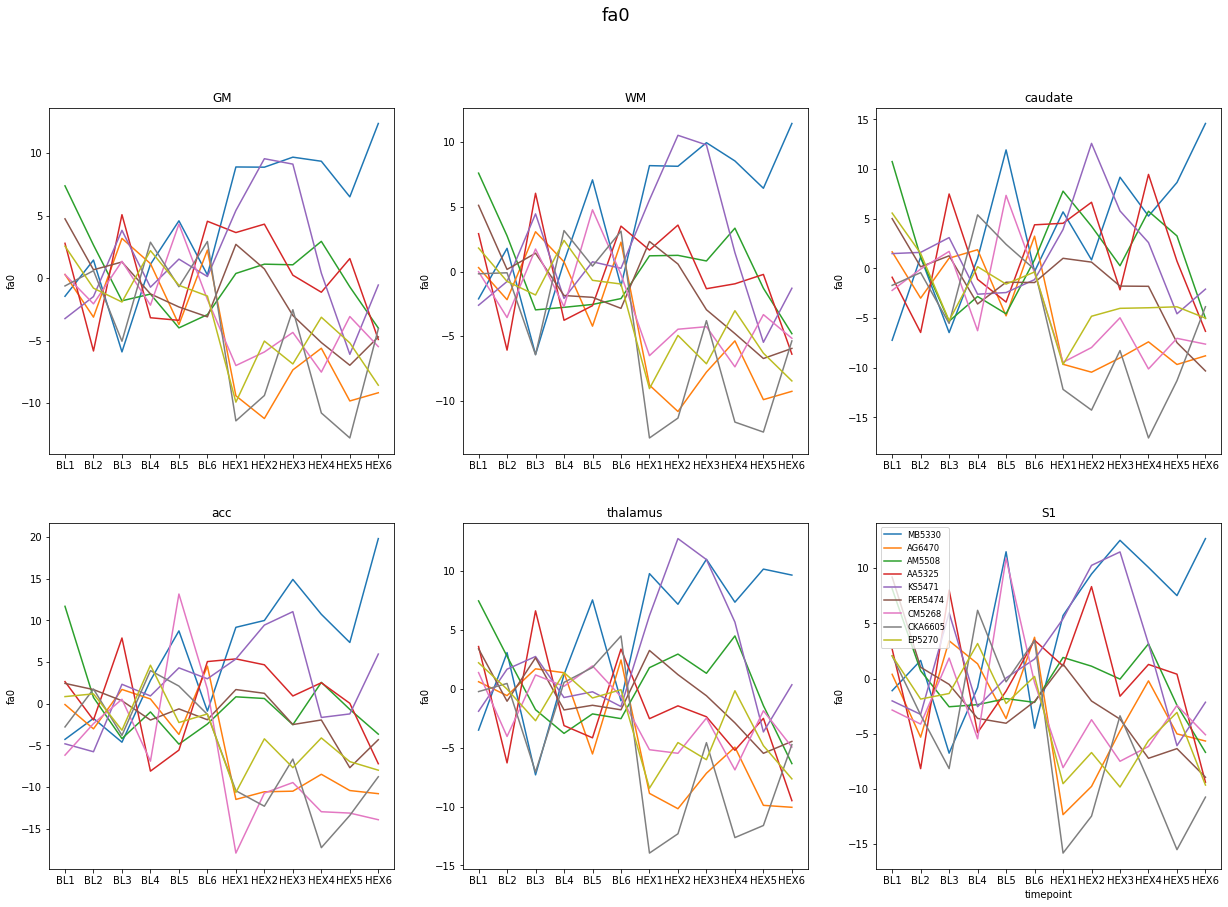

In [40]:
timepoints = ["BL1", "BL2", "BL3", "BL4", "BL5", "BL6", "HEX1", "HEX2", "HEX3", "HEX4", "HEX5", "HEX6"]
fig, axes = plt.subplots(2,3, figsize=(21,14))
# axes[1][2].set_visible(False)

# Choose scalar here
scalar = 'fa0'
scalar_df = df.loc[df.scalar == scalar]

rois = ['GM', 'WM', 'caudate', 'acc', 'thalamus', 'S1']

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
        if scalar=='rtop':
            ylim=[-10, 10]
        elif scalar=='md':
            ylim=[-10, 10]
        elif scalar=='iso':
            ylim=[-25, 25]
        elif scalar=='ISOVF':
            ylim=[-40, 40]
        elif scalar=='fa0':
            ylim=[-25, 25]
        
#         if scalar=='rtop':
#             ylim=[-150000000000, -86000000000]
#         elif scalar=='md':
#             ylim=[0.6, 1]
#         elif scalar=='iso':
#             ylim=[0.10, 0.35]
#         elif scalar=='ISOVF':
#             ylim=[0, 0.3]
#         elif scalar=='fa0':
#             ylim=[0.01, 0.10]
            
        for index, row in scalar_df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(timepoints, data, label=row.subject_id)
            ax.set_ylabel(scalar)
#             ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('timepoint')
plt.legend(loc='upper left', fontsize='small')
fig.suptitle(scalar, fontsize=18)
fname="figs_norm_fullbaseline/{}_timeseries.png".format(scalar)
plt.savefig(fname, facecolor='white', edgecolor='none')
plt.show()